In [1]:
# Step 1) Data Loading
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

plt.close("all")

dfLoad = pd.read_csv("https://raw.githubusercontent.com/meaningful96/CodeAttic/main/Dataset/1_LinearRegression_dataset.txt", sep ="\s+")


In [2]:
dfLoad

,xx,yy
0,0.478852,5.03227
1,1.186540,6.39201
2,0.431975,5.20052
3,0.657112,6.28876
4,0.136545,4.14239
...,...,...
95,1.929770,12.08280
96,1.676980,8.86659
97,1.285950,9.11764
98,0.510549,6.65626


Total number of Data: 100


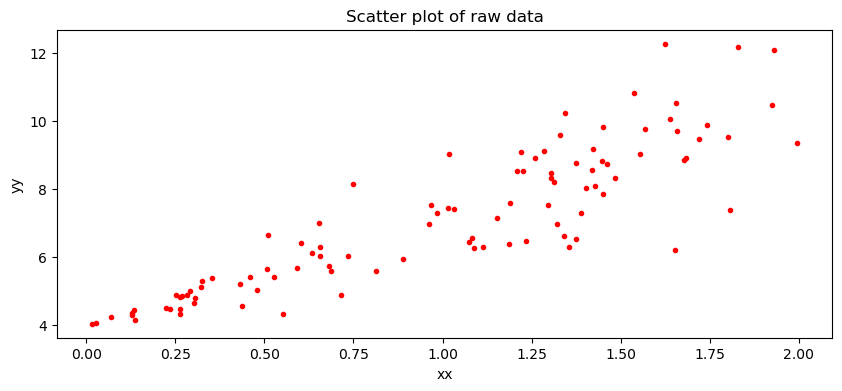

In [9]:
xxRaw = dfLoad['xx']
yyRaw = dfLoad['yy']

# Create subplots
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 4))

# Scatter plot of raw data
ax1.plot(xxRaw, yyRaw, 'r.')
ax1.set_title('Scatter plot of raw data')
ax1.set_xlabel('xx')
ax1.set_ylabel('yy')

print(f"Total number of Data: {len(xxRaw)}")

### Remind!
The reason for using 1-padding is to account for the bias (constant term).

In [14]:
# Step 2) Analytical Way, wOLS
Ndata = len(xxRaw)
xxRawNP = np.array(xxRaw)
yyRawNP = np.array(yyRaw)
X = np.column_stack([np.ones([Ndata, 1]), xxRaw]) # 1-padding

## Ordinary Least Squares
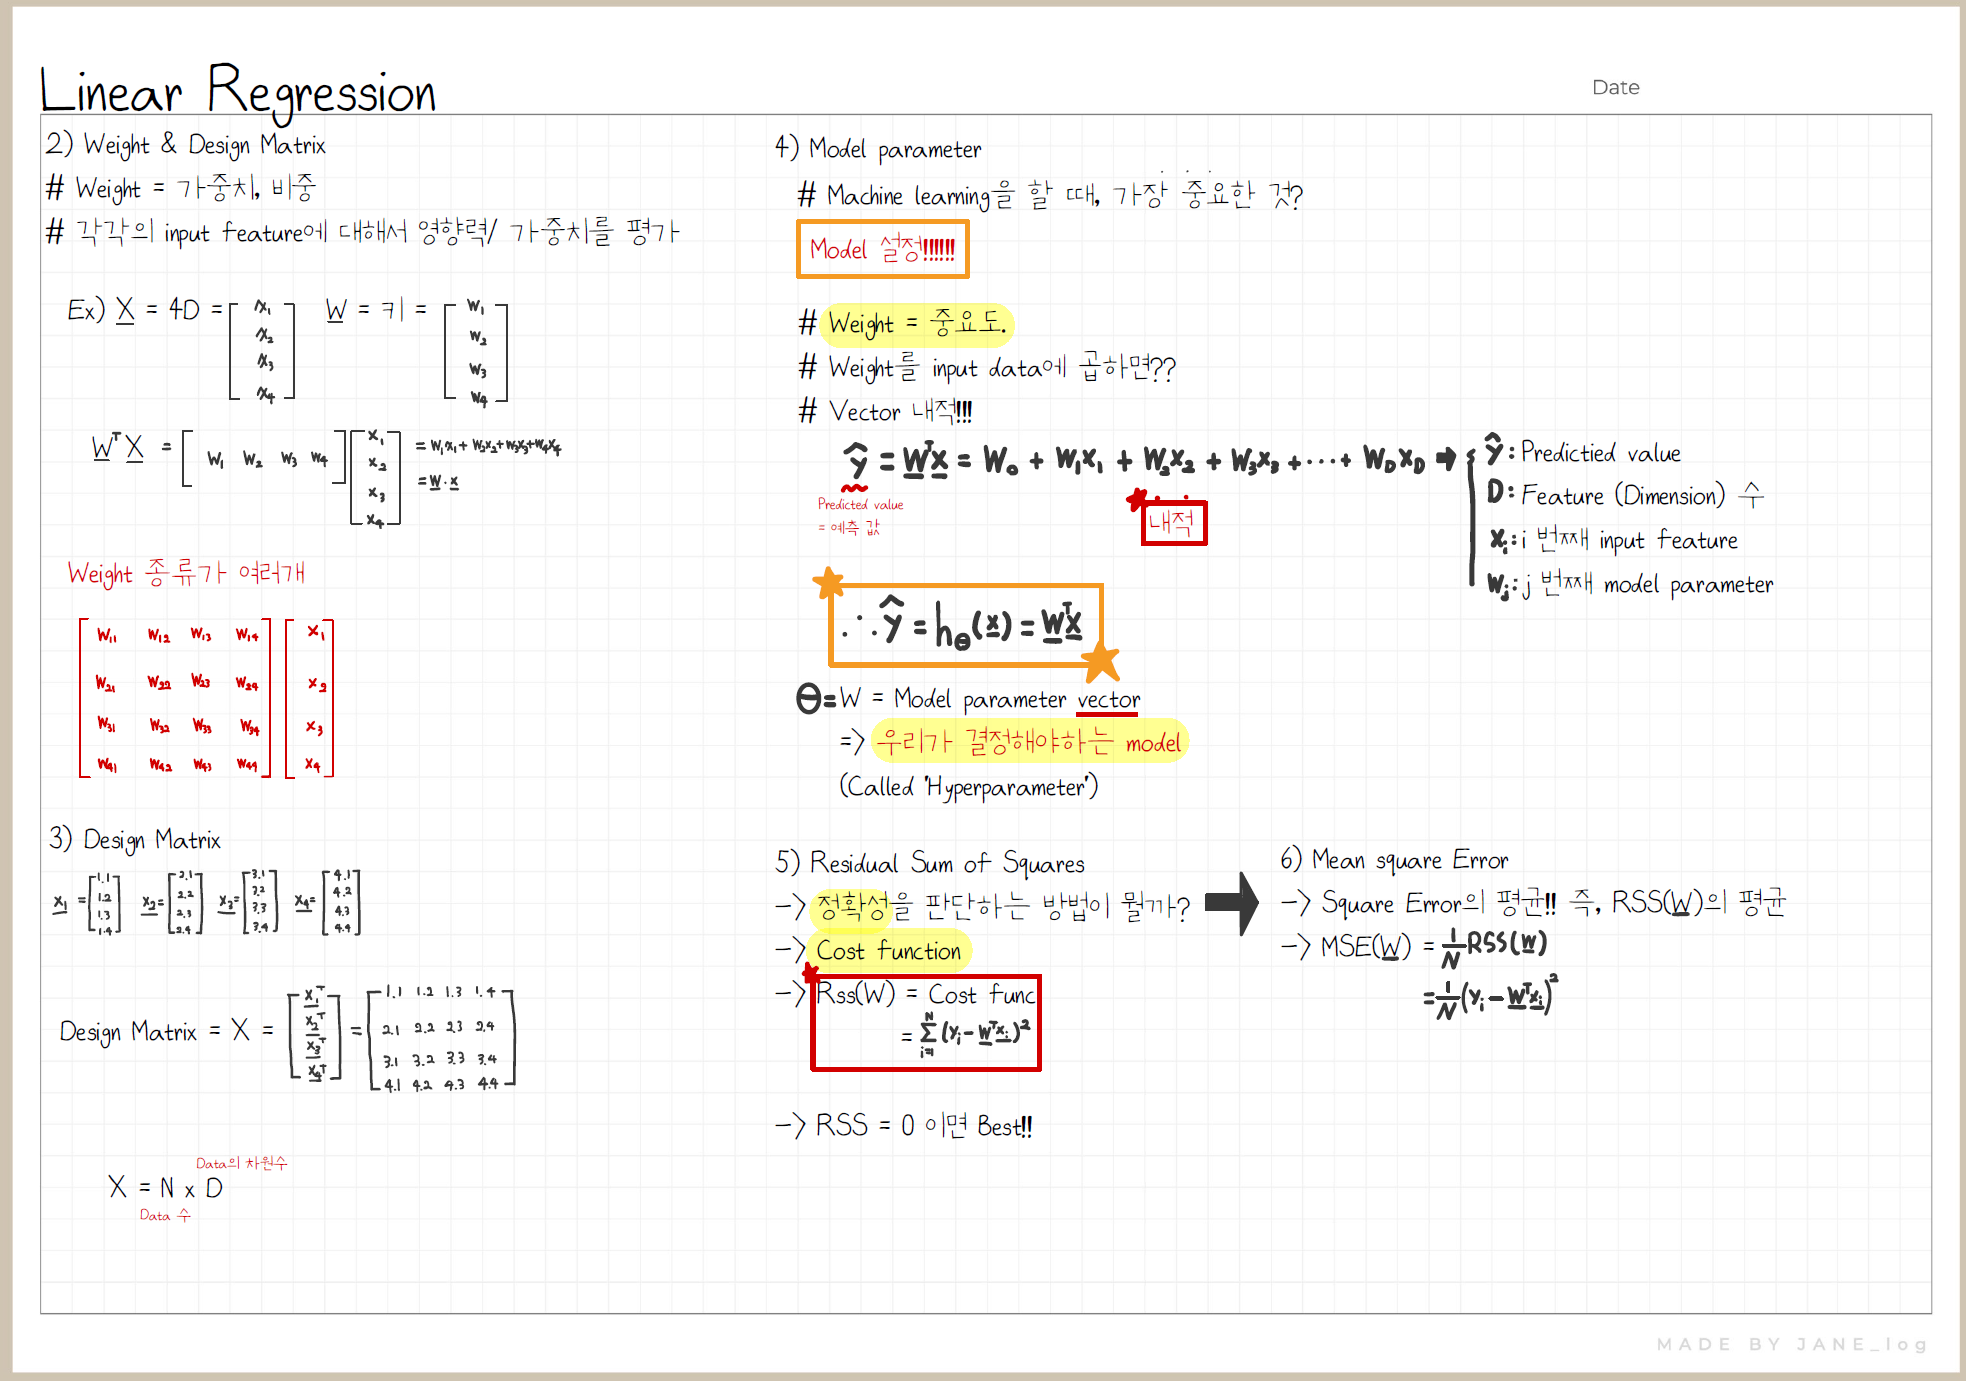

In [15]:
wOLS = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(yyRaw)

In [16]:
# array([3.8085273 , 3.34024009]) = (1-padding, weight)
wOLS 

array([3.8085273 , 3.34024009])

## Neumerical Way
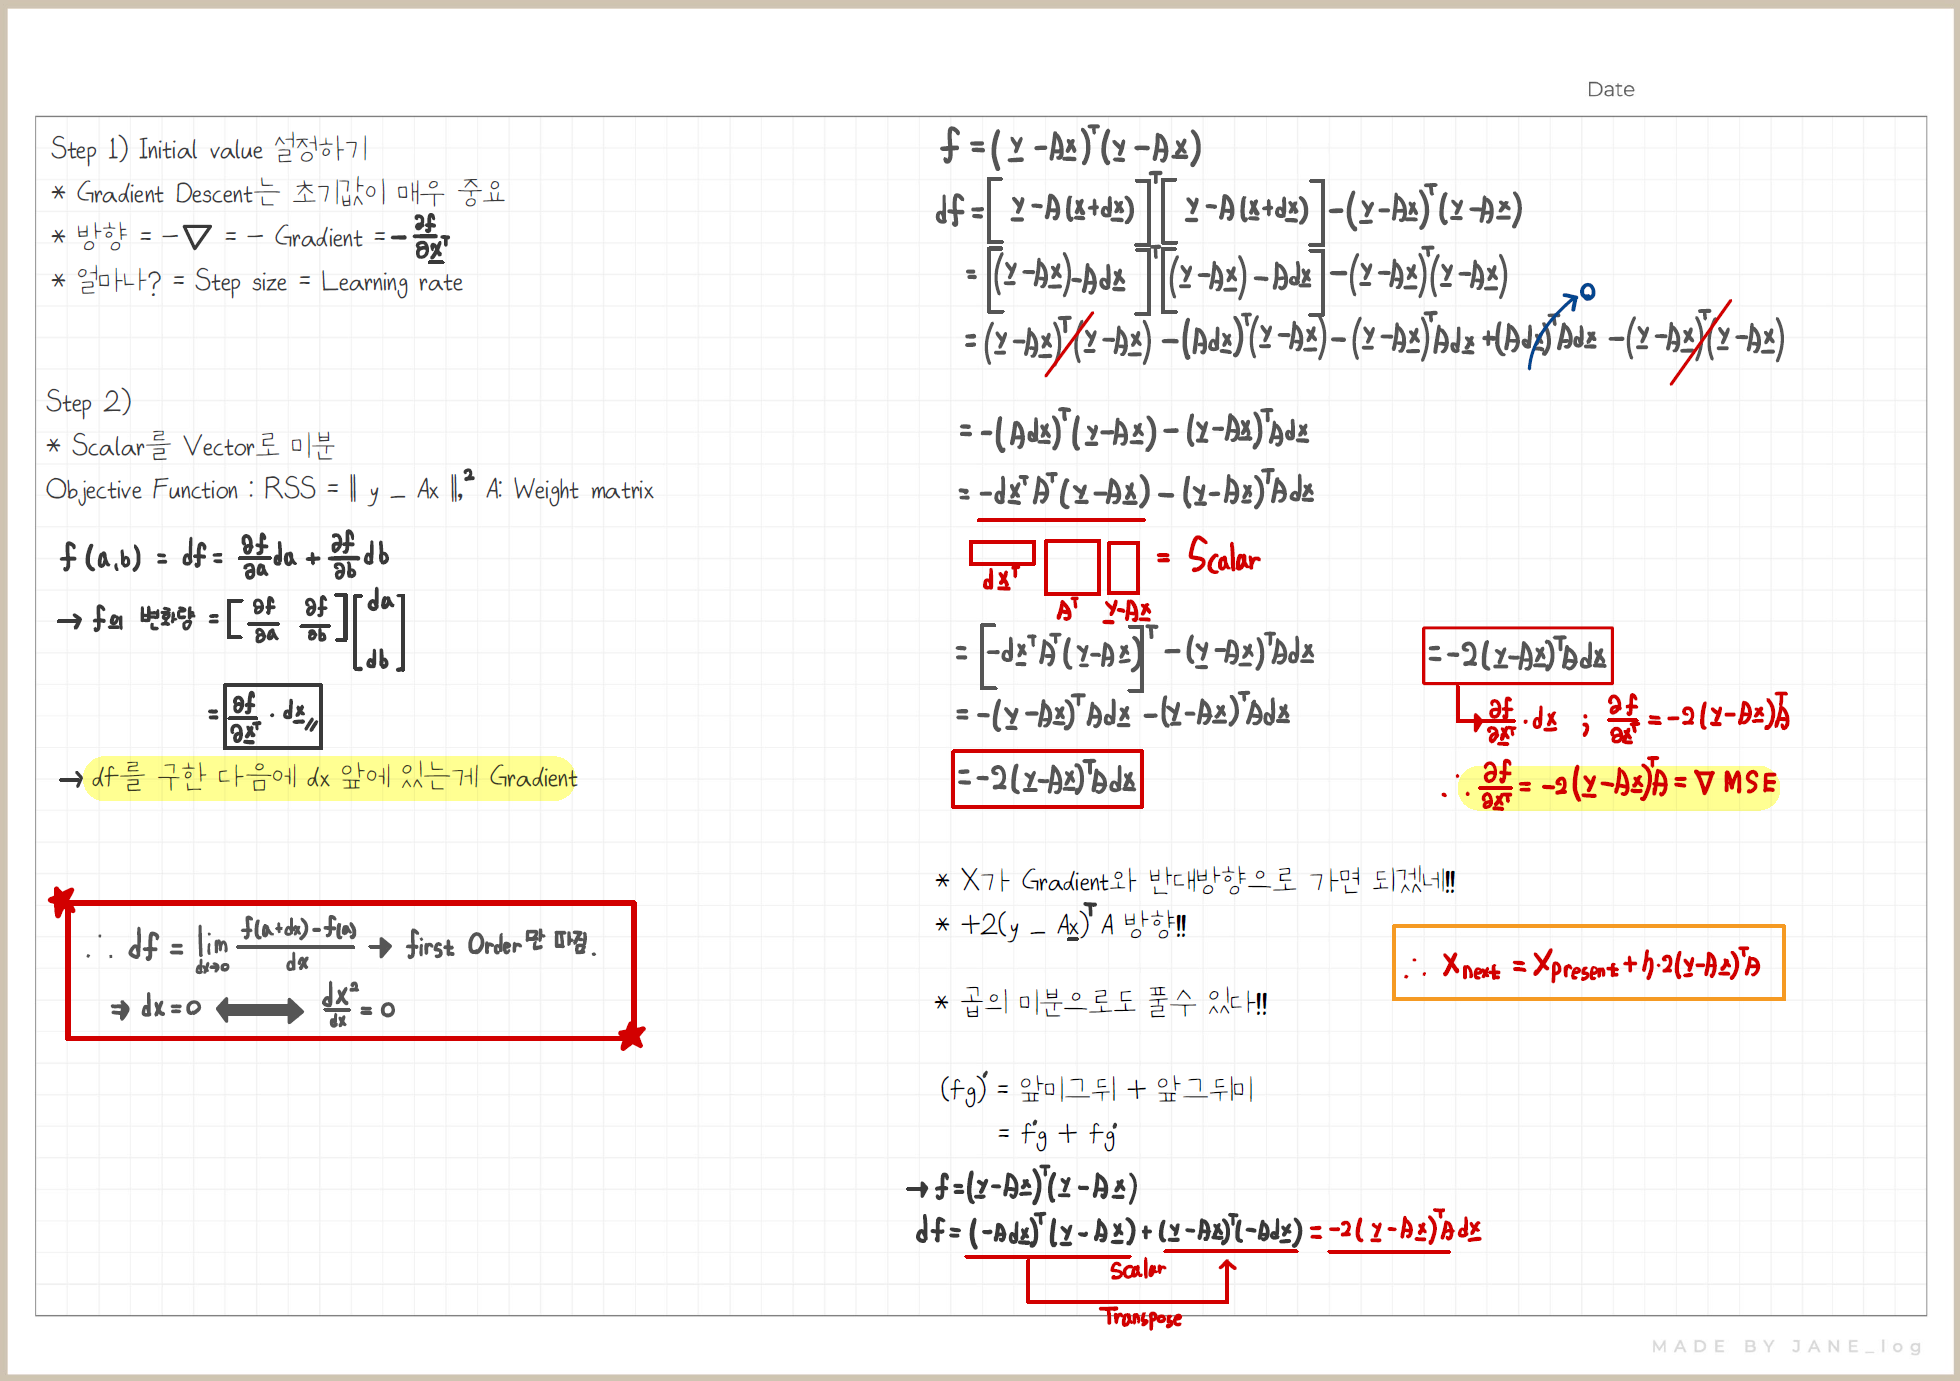    

In [17]:
# Step 3) Prediction
xPredict = np.linspace(0, 2, 101)
xPredictPadding = np.column_stack([np.ones([101, 1]), xPredict])

yPredict = wOLS.T.dot(xPredictPadding.T)

# Step 4) Numerical Way, Gradient Descent
eta = 0.1
niterations = 20
wGD = np.zeros([2, 1])

for iteration in range(niterations):
    gradients = -(2 / Ndata) * (X.T.dot(yyRawNP.reshape(Ndata, 1) - X.dot(wGD)))
    wGD = wGD - eta * gradients
    yGD = wGD.T.dot(xPredictPadding.T)


In [21]:
print(yGD.shape)
print(wGD.shape)

(1, 101)
(2, 1)


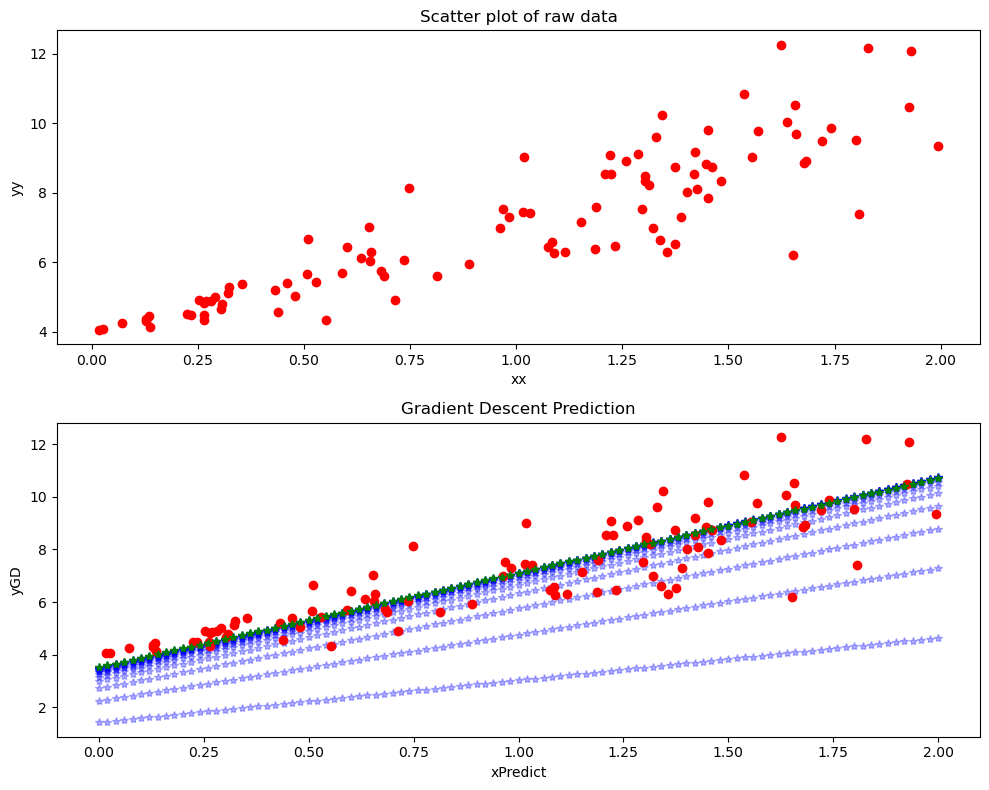

In [22]:
# Step 1) Data Loading
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

plt.close("all")

dfLoad = pd.read_csv("https://raw.githubusercontent.com/meaningful96/CodeAttic/main/Dataset/1_LinearRegression_dataset.txt", sep ="\s+")

xxRaw = dfLoad['xx']
yyRaw = dfLoad['yy']

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Scatter plot of raw data
ax1.plot(xxRaw, yyRaw, 'ro')
ax1.set_title('Scatter plot of raw data')
ax1.set_xlabel('xx')
ax1.set_ylabel('yy')

# Step 2) Analytical Way, wOLS
Ndata = len(xxRaw)
xxRawNP = np.array(xxRaw)
yyRawNP = np.array(yyRaw)
X = np.column_stack([np.ones([Ndata, 1]), xxRaw])

wOLS = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(yyRaw)

# Step 3) Prediction
xPredict = np.linspace(0, 2, 101)
xPredictPadding = np.column_stack([np.ones([101, 1]), xPredict])

yPredict = wOLS.T.dot(xPredictPadding.T)

# Step 4) Numerical Way, Gradient Descent
eta = 0.1
niterations = 20
wGD = np.zeros([2, 1])

for iteration in range(niterations):
    gradients = -(2 / Ndata) * (X.T.dot(yyRawNP.reshape(Ndata, 1) - X.dot(wGD)))
    wGD = wGD - eta * gradients
    yGD = wGD.T.dot(xPredictPadding.T)
    ax2.plot(xPredict, yGD.flatten(), 'b*', alpha=0.3)

ax2.plot(xxRaw, yyRaw, 'ro')
# Plot the final gradient descent prediction
ax2.plot(xPredict, yGD.flatten(), 'g*', label='GD Final Prediction')

ax2.set_title('Gradient Descent Prediction')
ax2.set_xlabel('xPredict')
ax2.set_ylabel('yGD')

# Show the plots
plt.tight_layout()
plt.show()